# Avaliação de desempenho

## Imports

In [8]:
import pandas as pd
import numpy as np
import json


## Parâmetros e configurações

In [76]:
level = 'l2'
path_acc = 'dados/sa23z_acc_mapbiomas_80_2022.csv'
path_class_settings = 'dados/config_classes.json'
path_strata = 'dados/strata.csv'

In [77]:
def saveHTML(df_style):
    file = open ('tmp/saida.html','w')
    file.write(df_style.to_html())
    file.close()

as classes ignoradas originalmente no repositorio [0, 31, 32, 30, 25, 23, 5, 29]

In [78]:
IGNORED_CLASSES = [0,6,9,25,32, 50]
#IGNORED_CLASSES = [0]
ALL_CLASSES = {
    0: {
        "l1_val": 0,
        "l1": "6. Não Observado",
        "l2_val": 0,
        "l2": "6. Não Observado",
        "l3_val": 0,
        "l3": "6. Não Observado"
    },
    3: {
        "l1_val": 1,
        "l1": "1. Floresta",
        "l2_val": 3,
        "l2": "1.1. Formação Florestal",
        "l3_val": 3,
        "l3": "1.1. Formação Florestal"
    },
    4: {
        "l1_val": 1,
        "l1": "1. Floresta",
        "l2_val": 4,
        "l2": "1.2. Formação Savânica",
        "l3_val": 4,
        "l3": "1.2. Formação Savânica"
    },
    5: {
        "l1_val": 1,
        "l1": "1. Floresta",
        "l2_val": 5,
        "l2": "1.3. Mangue",
        "l3_val": 5,
        "l3": "1.3. Mangue"
    },
    6: {"l1_val": 1, "l1": "1. Floresta", "l2_val": 6, "l2": "1.4. Floresta Alagável (beta)", "l3_val": 6, "l3": "1.4. Floresta Alagável (beta)"},
    9: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 9,
        "l2": "3.3. Floresta Plantada",
        "l3_val": 9,
        "l3": "3.3. Floresta Plantada"
    },
    11: {
        "l1_val": 10,
        "l1": "2. Formação Natural não Florestal",
        "l2_val": 11,
        "l2": "2.1. Campo Alagado e Área Pantanosa",
        "l3_val": 11,
        "l3": "2.1. Campo Alagado e Área Pantanosa"
    },
    12: {
        "l1_val": 10,
        "l1": "2. Formação Natural não Florestal",
        "l2_val": 12,
        "l2": "2.2. Formação Campestre (Campo)",
        "l3_val": 12,
        "l3": "2.2. Formação Campestre (Campo)"
    },
    13: {
        "l1_val": 10,
        "l1": "2. Formação Natural não Florestal",
        "l2_val": 13,
        "l2": "2.6. Outra Formação não Florestal",
        "l3_val": 13,
        "l3": "2.6. Outra Formação não Florestal"
    },
    15: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 15,
        "l2": "3.1. Pastagem",
        "l3_val": 15,
        "l3": "3.1. Pastagem"
    },
    19: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária"
    },
   
    20: { 
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária"
    },
    21: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 21,
        "l2": "3.4. Mosaico de Usos",
        "l3_val": 21,
        "l3": "3.4. Mosaico de Usos"
    },
    23: {
        "l1_val": 22,
        "l1": "4. Área não Vegetada",
        "l2_val": 23,
        "l2": "4.1. Praia e Duna",
        "l3_val": 23,
        "l3": "4.1. Praia e Duna"
    },
    24: {
        "l1_val": 22,
        "l1": "4. Área não Vegetada",
        "l2_val": 24,
        "l2": "4.2. Infraestrutura Urbana",
        "l3_val": 24,
        "l3": "4.2. Infraestrutura Urbana"
    },
    25: {
        "l1_val": 22,
        "l1": "4. Área não Vegetada",
        "l2_val": 25,
        "l2": "4.4. Outra Área não Vegetada",
        "l3_val": 25,
        "l3": "4.4. Outra Área não Vegetada"
    },
    29: {
        "l1_val": 10,
        "l1": "2. Formação Natural não Florestal",
        "l2_val": 29,
        "l2": "2.4. Afloramento Rochoso",
        "l3_val": 29,
        "l3": "2.4. Afloramento Rochoso"
    },
    30: {
        "l1_val": 22,
        "l1": "4. Área não Vegetada",
        "l2_val": 30,
        "l2": "4.3. Mineração",
        "l3_val": 30,
        "l3": "4.3. Mineração"
    },
    31: {
        "l1_val": 26,
        "l1": "5. Corpo D'água",
        "l2_val": 63,
        "l2": "5.2. Corpos D'Água Artificiais",
        "l3_val": 31,
        "l3": "5.2. Aquicultura"
    },
    32: {
        "l1_val": 10,
        "l1": "2. Formação Natural não Florestal",
        "l2_val": 32,
        "l2": "2.3. Apicum",
        "l3_val": 32,
        "l3": "2.3. Apicum"
    },
    33: {
        "l1_val": 26,
        "l1": "5. Corpo D'água",
        "l2_val": 33,
        "l2": "5.1. Rio, Lago e Oceano",
        "l3_val": 33,
        "l3": "5.1. Rio, Lago e Oceano"
    },
    36: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 36,
        "l3": "3.2.2. Lavoura Perene"
    },
    39: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária",
        #"l4_val": 39,
        #"l4": "3.2.2.1. Soja"
    },
    40: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária",
        #"l4_val": 40,
        #"l4": "3.2.2.3. Arroz"
    },
    41: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária",
        #"l4_val": 41,
        #"l4": "3.2.1.3. Outras Lavouras Temporárias"
    },
    46: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária",
        #"l4_val": 46,
        #"l4": "3.2.1.1. Café"
    },
    47: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária",
        #"l4_val": 47,
        #"l4": "3.2.1.2. Citrus"
    },
    48: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária",
        #"l4_val": 48,
        #"l4": " 3.2.2.3. Outras Lavoura Perene"
    },
    49: {
        "l1_val": 1,
        "l1": "1. Floresta",
        "l2_val": 2,
        "l2": "1.4. Restinga Florestal",
        "l3_val": 49,
        "l3": "1.4. Restinga Florestal"
    },
    50: {
        "l1_val": 10,
        "l1": "2. Formação Natural não Florestal",
        "l2_val": 50,
        "l2": "2.5. Restinga Herbácea/Arbustiva",
        "l3_val": 50,
        "l3": "2.5. Restinga Herbácea/Arbustiva"
    },
    62: {
        "l1_val": 14,
        "l1": "3. Agropecuária",
        "l2_val": 18,
        "l2": "3.2. Agricultura",
        "l3_val": 19,
        "l3": "3.2.1. Lavoura Temporária",
        #"l4_val": 62,
        #"l4": "3.2.1.4. Algodão (beta)"
    },
    63: {
        "l1_val": 26,
        "l1": "5. Corpo D'água",
        "l2_val": 63,
        "l2": "5.2. Corpos D'Água Artificiais",
        "l3_val": 63,
        "l3": "5.2. Corpos D'Água Artificiais"
    },
}

## Entrada de dados

Arquivo com os dados de classificação e os dados de referencia de 2022, gerado no google earth engine:

https://code.earthengine.google.com/365963f4785378c21da4b24fa43061fb

so adicionado como limite o grupode de cartas SA-23-Z

In [79]:
df_acc = pd.read_csv(path_acc)
df_acc.head()

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,NEW_WEIGHT,PESO_VOT,PROB_AMOS2,StateNB,TARGETID,VAL_PESO,classification,reference,year,.geo
0,0000000000000000508d_0,NaN,0,1,SA-23-Z,APICUM,D2,-2.368226,-43.544883,0.000011,55301.697925,0.000014,0.000014,21.0,12037,1.0,3,32,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,00000000000000004b0e_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,60305.967634,0.000014,0.000014,21.0,16624,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,00000000000000004b0f_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.691714,-44.849776,0.000012,60305.967634,0.000014,0.000014,21.0,16625,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,00000000000000004b1b_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,60305.967634,0.000014,0.000014,21.0,16656,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,00000000000000004b26_0,Treinamento,1,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.720550,-44.673527,0.000012,60305.967634,0.000014,0.000014,21.0,16694,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}"


apenas as amostras SA23-Z

In [80]:
df_acc.shape

(712, 20)

Configuracao com as classes, comentei para usar identico ao do repositorio

In [199]:
#with open(path_class_settings, 'r') as arquivo:
    #config_classes = json.load(arquivo)
#config_classes['IGNORED_CLASSES']

Para não ignorar essas classes:

In [200]:
#config_classes['IGNORED_CLASSES'] = [0]
#config_classes['IGNORED_CLASSES']

Aqui, não irei usar o arquivo points_strata.csv, pois os dados do target_id estao errados na coleção das amostras

pegarei apenas o dadoq que tem a populacao por estrato

In [81]:
df_strata = pd.read_csv(path_strata)
df_strata.head()

,strata_id,pop
0,SH-21-Z_D1,22049360.0
1,SI-22-V_D1,19367713.0
2,SF-24-V_D1,4483278.0
3,SF-23-Z_D1,3193040.0
4,SC-24-Z_D1,18863275.0


In [82]:
df_strata.shape ## todas os estratos

(762, 2)

## Tratamento de dados

### Gerando a coluna strata_id

como os estrato id estao errados nos dados que tive acesso no mapbiomas, vou criar o estrato id com base no dado do estrato e da declividade

In [83]:
df_acc['strata_id'] = df_acc["CARTA_2"] + "_" + df_acc["DECLIVIDAD"]

verificando os estratos

In [84]:
df_acc["strata_id"].unique()

array(['SA-23-Z_D2', 'SA-23-Z_D1', 'SA-23-Z_D3', 'SA-23-Z_D4',
       'SA-23-Z_D6', 'SA-23-Z_D5'], dtype=object)

### Pegando os dados dado da populacao

In [85]:
df_acc = pd.merge(df_acc, df_strata, how='inner', on="strata_id")
df_acc.head()

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,...,PROB_AMOS2,StateNB,TARGETID,VAL_PESO,classification,reference,year,.geo,strata_id,pop
0,0000000000000000508d_0,NaN,0,1,SA-23-Z,APICUM,D2,-2.368226,-43.544883,0.000011,...,0.000014,21.0,12037,1.0,3,32,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0
1,00000000000000004b0e_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,...,0.000014,21.0,16624,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0
2,00000000000000004b0f_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.691714,-44.849776,0.000012,...,0.000014,21.0,16625,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0
3,00000000000000004b1b_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,...,0.000014,21.0,16656,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0
4,00000000000000004b26_0,Treinamento,1,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.720550,-44.673527,0.000012,...,0.000014,21.0,16694,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0


In [86]:
df_acc['pop'].head()

0    27861902.0
1    25366123.0
2    25366123.0
3    25366123.0
4    25366123.0
Name: pop, dtype: float64

### Pegando a quantidade de amostras por estrato

contar a quantidade de amostras por estrato

<Axes: ylabel='strata_id'>

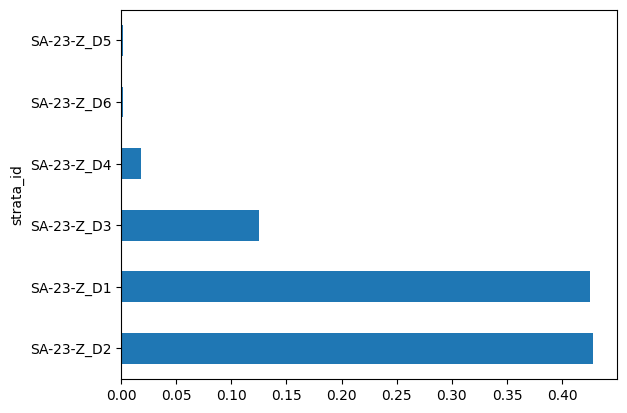

In [87]:
df_acc['strata_id'].value_counts(normalize=True).plot(kind='barh')

In [88]:
df_qt_samples = df_acc['strata_id'].value_counts().reset_index(name='n_samp')
df_qt_samples

,strata_id,n_samp
0,SA-23-Z_D2,305
1,SA-23-Z_D1,303
2,SA-23-Z_D3,89
3,SA-23-Z_D4,13
4,SA-23-Z_D6,1
5,SA-23-Z_D5,1


In [89]:
df_qt_samples.sum()

strata_id    SA-23-Z_D2SA-23-Z_D1SA-23-Z_D3SA-23-Z_D4SA-23-...
n_samp                                                     712
dtype: object

depois plotar um mapa os pontos por estrato

In [90]:
df_acc = pd.merge(df_acc, df_qt_samples, on='strata_id')
df_acc.head()

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,...,StateNB,TARGETID,VAL_PESO,classification,reference,year,.geo,strata_id,pop,n_samp
0,0000000000000000508d_0,NaN,0,1,SA-23-Z,APICUM,D2,-2.368226,-43.544883,0.000011,...,21.0,12037,1.0,3,32,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0,305
1,00000000000000004b0e_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,...,21.0,16624,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
2,00000000000000004b0f_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.691714,-44.849776,0.000012,...,21.0,16625,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
3,00000000000000004b1b_0,NaN,0,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,...,21.0,16656,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
4,00000000000000004b26_0,Treinamento,1,1,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.720550,-44.673527,0.000012,...,21.0,16694,1.0,6,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303


verificar se esta ok numero de amostras e populacao

In [91]:
df_acc.columns

Index(['system:index', 'AMOSTRAS', 'AMOSTRA_AM', 'BioNB', 'CARTA_2',
       'CLASS_2022', 'DECLIVIDAD', 'LAT', 'LON', 'NEW_PROB', 'NEW_WEIGHT',
       'PESO_VOT', 'PROB_AMOS2', 'StateNB', 'TARGETID', 'VAL_PESO',
       'classification', 'reference', 'year', '.geo', 'strata_id', 'pop',
       'n_samp'],
      dtype='object')

In [92]:
df_contagem = df_acc.groupby("strata_id")[['n_samp','pop', 'PROB_AMOS2']].first()
df_contagem

,n_samp,pop,PROB_AMOS2
strata_id,,,
SA-23-Z_D1,303,25366123.0,0.000014
SA-23-Z_D2,305,27861902.0,0.000014
SA-23-Z_D3,89,7842002.0,0.000014
SA-23-Z_D4,13,1111132.0,0.000014
SA-23-Z_D5,1,4130.0,0.000242
SA-23-Z_D6,1,2744.0,0.000364


checando a probabilidade

In [93]:
df_contagem["prob_calc"] = df_contagem['n_samp'] / df_contagem['pop']
df_contagem

,n_samp,pop,PROB_AMOS2,prob_calc
strata_id,,,,
SA-23-Z_D1,303,25366123.0,0.000014,0.000012
SA-23-Z_D2,305,27861902.0,0.000014,0.000011
SA-23-Z_D3,89,7842002.0,0.000014,0.000011
SA-23-Z_D4,13,1111132.0,0.000014,0.000012
SA-23-Z_D5,1,4130.0,0.000242,0.000242
SA-23-Z_D6,1,2744.0,0.000364,0.000364


In [94]:
df_contagem.sum()

n_samp        7.120000e+02
pop           6.218803e+07
PROB_AMOS2    6.632598e-04
prob_calc     6.525031e-04
dtype: float64

### Atualiza o nome dos biomas, para texto

In [95]:
df_acc.loc[ (df_acc['BioNB']==1),'BioNB'] = 'Amazônia'
df_acc.loc[ (df_acc['BioNB']==2),'BioNB'] = 'Mata Atlântica'
df_acc.loc[ (df_acc['BioNB']==3),'BioNB'] = 'Pantanal'
df_acc.loc[ (df_acc['BioNB']==4),'BioNB'] = 'Cerrado'
df_acc.loc[ (df_acc['BioNB']==5),'BioNB'] = 'Caatinga'
df_acc.loc[ (df_acc['BioNB']==6),'BioNB'] = 'Pampa'

/tmp/ipykernel_342941/3599183855.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Amazônia' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_acc.loc[ (df_acc['BioNB']==1),'BioNB'] = 'Amazônia'


In [96]:
df_acc['BioNB'].unique()

array(['Amazônia', 'Cerrado'], dtype=object)

### Atualizando os codigos das classes de acordo com o nivel, e outros ajustes

#### Converte codigos das classe

In [97]:
df_acc['classification'].value_counts().sort_index()

classification
3     290
4     104
5      32
6      29
9       3
11     61
12     10
15     92
21     18
23     14
24     10
25      5
32      5
33     26
39     12
41      1
Name: count, dtype: int64

In [98]:
classif_1 = df_acc['classification'].unique()
classif_1.sort()
classif_1

array([ 3,  4,  5,  6,  9, 11, 12, 15, 21, 23, 24, 25, 32, 33, 39, 41])

In [99]:
df_acc['reference'].value_counts().sort_index()

reference
3     300
4     117
5      17
9       4
11     59
12     22
15    115
19     14
23     18
24     10
25      1
32      3
33     20
50     12
Name: count, dtype: int64

In [100]:
reference_1 = df_acc['reference'].unique()
reference_1.sort()
reference_1

array([ 3,  4,  5,  9, 11, 12, 15, 19, 23, 24, 25, 32, 33, 50])

Observando a classificacao e a reference, observamos algumas classes que aparece em uma e nao na outra, porém a funcao de convert_class corrige algumas, provavelmente pq mudaram se os codigos de algumas destas. pesquisar melhor


classificacao

6 - Floresta Alagável (nivel 2)

21 - mosaico de usos (nivel 2)

39 - Soja (nivel 3)

41 - Outras Lavouras Temporárias (nivel 3)

reference

19 - Lavoura Temporária (nivel 3)

50 - Restinga Herbácea

In [101]:
def convert_class(df):

    #Global

    df.loc[ (df['classification'] == 20) | (df['classification'] == 39) | (df['classification'] == 40) | (df['classification'] == 41) | (df['classification'] == 62), 'classification'] = 19 #Convert areas mapped as 20,39,40,41 to 19
    df.loc[ (df['classification'] == 46) | (df['classification'] == 47) | (df['classification'] == 48), 'classification'] = 36 #Convert areas mapped as 46,47,48 to 36
    df.loc[ (df['classification'] == 51) | (df['classification'] == 52) | (df['classification'] == 53), 'classification'] = 24 #Convert areas mapped as 20,39,41 to 24
    df.loc[ (df['classification'] == 49), 'classification'] = 3 #Convert areas mapped as 54,55,56 to 33
    df.loc[ (df['classification'] == 50), 'classification'] = 13 #Convert areas mapped as 54,55,56 to 33
    df.loc[ (df['classification'] == 54) | (df['classification'] == 55) | (df['classification'] == 56), 'classification'] = 33 #Convert areas mapped as 54,55,56 to 33
    df.loc[ (df['classification'] == 21) & (df['reference'].isin([15,19,20,36])), 'reference'] = 21 #Convert reference from 15,19,20,36 to reference 21 for areas mapped as 21
    df.loc[ (df['classification'] == 63), 'classification'] = 33    

    #Pampa 

    df.loc[ (df['BioNB']== 'Pampa') & (df['reference'] == 15),'reference'] = 19 #In Pampa, convert reference class 15 to 19 (Crop).
    df.loc[ (df['BioNB']=='Pampa') & (df['classification'] == 25) & (df['reference'] == 23), 'reference'] = 25 #In Pampa, convert reference 25 to 23 in areas mapped as 25
    df.loc[ (df['BioNB']== 'Pampa') & (df['classification'] == 12) & (df['reference'] == 13),'reference'] = 12 #In Pampa, convert reference 13 to 12 in areas mapped as 12
    df.loc[ (df['BioNB']== 'Pampa') & (df['classification'] == 13),'classification'] = 12 #In Pampa, convert reference 13 to 12 in areas mapped as 12

    #Mata Atântica

    df.loc[ (df['BioNB']== 'Mata Atlântica') & (df['classification'] == 11) & (df['reference'] == 13),'reference'] = 11

    #Pantanal

    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 11) & (df['reference'] == 12),'reference'] = 11 #In Pantanal, convert reference 12 to 11 in areas mapped as 11
    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 11) & (df['reference'] == 33),'reference'] = 11 #In Pantanal, convert reference 33 to 11 in areas mapped as 11
    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 12) & (df['reference'] == 33),'reference'] = 12 #In Pantanal, convert reference 33 to 12 in areas mapped as 12
    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 12) & (df['reference'] == 11),'reference'] = 12 #NEW!#In Pantanal, convert reference 33 to 12 in areas mapped as 12
    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 33) & (df['reference'] == 11),'classification'] = 11 #In Pantanal, convert reference 33 to 11 in areas mapped as 11
    df.loc[ (df['BioNB']== 'Pantanal') & (df['classification'] == 33) & (df['reference'] == 12),'classification'] = 12 #In Pantanal, convert reference 33 to 12 in areas mapped as 12

    #Amazônia

    df.loc[ (df['BioNB']=='Amazônia') & (df['classification'] == 12) & (df['reference'] == 13), 'reference'] = 12 #In Amazon, convert reference 13 to 12 in areas mapped as 12
    df.loc[ (df['BioNB']=='Amazônia') & (df['classification'] == 4) & (df['reference'] == 13), 'reference'] = 4 #In Amazon, convert reference 13 to 4 in areas mapped as 4

    #Cerrado

    df.loc[ (df['BioNB']=='Cerrado') & (df['reference'] == 11),'reference'] = 12
    df.loc[ (df['BioNB']=='Cerrado') & (df['classification'] == 11),'classification'] = 12 
    df.loc[ (df['BioNB']=='Cerrado') & (df['classification'] == 12)  & (df['reference'] == 13), 'reference'] = 12 #In Cerrado, convert reference 13 to 12 in areas mapped as 12
    df.loc[ (df['BioNB']=='Cerrado') & (df['classification'] == 25) & (df['reference'] == 23), 'reference'] = 25 #In Cerrado, convert reference 25 to 23 in areas mapped as 25

    return df

In [102]:
df_acc = convert_class(df_acc)

#### Verificando se mudou alguma classe

In [103]:
df_acc['classification'].value_counts().sort_index()

classification
3     290
4     104
5      32
6      29
9       3
11     59
12     12
15     92
19     13
21     18
23     14
24     10
25      5
32      5
33     26
Name: count, dtype: int64

In [104]:
classif_2 = df_acc['classification'].unique()
classif_2.sort()
classif_2

array([ 3,  4,  5,  6,  9, 11, 12, 15, 19, 21, 23, 24, 25, 32, 33])

In [105]:
print (classif_1)
print (classif_2)

[ 3  4  5  6  9 11 12 15 21 23 24 25 32 33 39 41]
[ 3  4  5  6  9 11 12 15 19 21 23 24 25 32 33]


In [106]:
np.setdiff1d (classif_1 , classif_2)

array([39, 41])

as classes 39 e 41 viram 19, afetaria o nivel 3, pois soja e Outras Lavouras Temporárias viram lavoura temporaria no nivel 2

In [107]:
np.setdiff1d (classif_2 , classif_1)

array([19])

In [108]:
df_acc['reference'].value_counts().sort_index()

reference
3     300
4     117
5      17
9       4
11     55
12     26
15    106
19     13
21     10
23     14
24     10
25      5
32      3
33     20
50     12
Name: count, dtype: int64

In [109]:
reference_2 = df_acc['reference'].unique()
reference_2.sort()
reference_2


array([ 3,  4,  5,  9, 11, 12, 15, 19, 21, 23, 24, 25, 32, 33, 50])

In [110]:
print (reference_1)
print (reference_2)

[ 3  4  5  9 11 12 15 19 23 24 25 32 33 50]
[ 3  4  5  9 11 12 15 19 21 23 24 25 32 33 50]


In [111]:
np.setdiff1d (reference_1 , reference_2)

array([], dtype=int64)

In [112]:
np.setdiff1d (reference_2 , reference_1)

array([21])

Observando a classificacao e a reference, observamos algumas classes que aparece em uma e nao na outra:

- 50 - Restinga Herbácea aparece apenas na referencia
- 6 - Floresta Alagável aparece apenas na classificacao

#### Atualizando os codigo por nível

mudei o codigo original, agora eu pego todas as classes, nao apenas as que aparece em ambos

codigo do repositorio

In [113]:
def get_classes(df, level='l3'):

    class_values = {}
    class_names = {}

    clas_classes = pd.Index(df['classification'].unique())
    ref_classes = pd.Index(df['reference'].unique())

    # não sei se deveria pegar so os que estao em comum, mas para nao mexer muito, vou deixar
    acc_classes =clas_classes.intersection(ref_classes)
    #acc_classes =clas_classes.union(ref_classes)

    val_remap = {}

    for value in ALL_CLASSES.keys():
        if (value not in IGNORED_CLASSES and (value in acc_classes)):
            
            val_key = "%s_val" % (level)
            new_val = ALL_CLASSES[value][val_key]
            class_name = ALL_CLASSES[value][level]

            val_remap[value] = new_val
            class_values[new_val] = True
            class_names[class_name] = True

    df = df[df['classification'].isin(val_remap.keys())]
    df = df[df['reference'].isin(val_remap.keys())]

    df['classification'] = df['classification'].map(val_remap)
    df['reference'] = df['reference'].map(val_remap)

    class_values = list(class_values.keys())
    class_names = list(class_names.keys())

    return df, class_values, class_names

In [114]:
##df_acc, class_values, class_names = get_classes(df_acc, config_classes, level)
df_acc, class_values, class_names = get_classes(df_acc, level)
df_acc.head()

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,...,StateNB,TARGETID,VAL_PESO,classification,reference,year,.geo,strata_id,pop,n_samp
1,00000000000000004b0e_0,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,...,21.0,16624,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
3,00000000000000004b1b_0,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,...,21.0,16656,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
5,00000000000000004b2f_0,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.127662,-44.787253,0.000012,...,21.0,16709,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
6,00000000000000004b34_0,Treinamento,1,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.696471,-44.734432,0.000012,...,21.0,16717,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303
7,00000000000000004b36_0,Treinamento,1,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.555350,-44.806927,0.000012,...,21.0,16720,1.0,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303


In [115]:
df_acc.shape

(655, 23)

In [116]:
len(class_names)

11

#### Verificando se as classes mudaram

In [117]:
reference_3 = df_acc['reference'].unique()
reference_3.sort()
reference_3

classif_3 = df_acc['classification'].unique()
classif_3.sort()
classif_3

print (reference_2)
print (reference_3)
print ('-----')
print (classif_2)
print (classif_3)

[ 3  4  5  9 11 12 15 19 21 23 24 25 32 33 50]
[ 3  4  5 11 12 15 18 21 23 24 33]
-----
[ 3  4  5  6  9 11 12 15 19 21 23 24 25 32 33]
[ 3  4  5 11 12 15 18 21 23 24 33]


#### Pegando os dados das classes

In [118]:
df_by_class = pd.DataFrame ( {
    'Class_Names' : class_names,
    'Class_Values' : class_values
}).set_index('Class_Values')
df_by_class

,Class_Names
Class_Values,
3,1.1. Formação Florestal
4,1.2. Formação Savânica
5,1.3. Mangue
11,2.1. Campo Alagado e Área Pantanosa
12,2.2. Formação Campestre (Campo)
15,3.1. Pastagem
18,3.2. Agricultura
21,3.4. Mosaico de Usos
23,4.1. Praia e Duna


In [119]:
df_by_class['qt_class'] = df_acc['classification'].value_counts()
df_by_class

,Class_Names,qt_class
Class_Values,,
3,1.1. Formação Florestal,289
4,1.2. Formação Savânica,93
5,1.3. Mangue,32
11,2.1. Campo Alagado e Área Pantanosa,59
12,2.2. Formação Campestre (Campo),10
15,3.1. Pastagem,92
18,3.2. Agricultura,13
21,3.4. Mosaico de Usos,18
23,4.1. Praia e Duna,14


In [120]:
df_by_class['qt_reference'] = df_acc['reference'].value_counts()

In [121]:
df_by_class

,Class_Names,qt_class,qt_reference
Class_Values,,,
3,1.1. Formação Florestal,289,282
4,1.2. Formação Savânica,93,117
5,1.3. Mangue,32,15
11,2.1. Campo Alagado e Área Pantanosa,59,47
12,2.2. Formação Campestre (Campo),10,25
15,3.1. Pastagem,92,102
18,3.2. Agricultura,13,13
21,3.4. Mosaico de Usos,18,10
23,4.1. Praia e Duna,14,14


resultado, quando modifiquei o get class, so perdi os dados da floresta alagavel e restinga

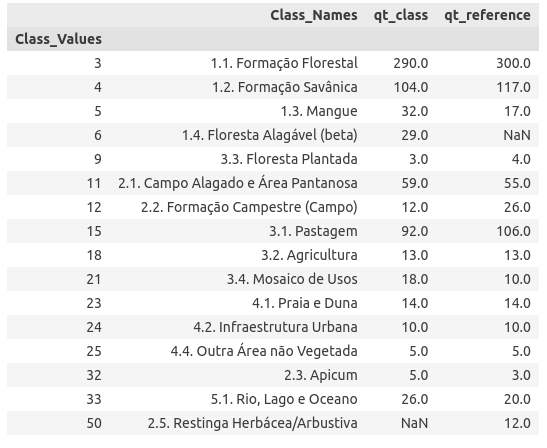

In [122]:
712 - (12+29)

671

aqui, vou substituir os nas por zero, ja que é zero a quantidade de classificados

In [123]:
df_by_class.fillna(0, inplace=True)
df_by_class

,Class_Names,qt_class,qt_reference
Class_Values,,,
3,1.1. Formação Florestal,289,282
4,1.2. Formação Savânica,93,117
5,1.3. Mangue,32,15
11,2.1. Campo Alagado e Área Pantanosa,59,47
12,2.2. Formação Campestre (Campo),10,25
15,3.1. Pastagem,92,102
18,3.2. Agricultura,13,13
21,3.4. Mosaico de Usos,18,10
23,4.1. Praia e Duna,14,14


In [124]:
df_by_class.sort_values('qt_class', ascending=False)

,Class_Names,qt_class,qt_reference
Class_Values,,,
3,1.1. Formação Florestal,289,282
4,1.2. Formação Savânica,93,117
15,3.1. Pastagem,92,102
11,2.1. Campo Alagado e Área Pantanosa,59,47
5,1.3. Mangue,32,15
33,"5.1. Rio, Lago e Oceano",26,20
21,3.4. Mosaico de Usos,18,10
23,4.1. Praia e Duna,14,14
18,3.2. Agricultura,13,13


In [125]:
df_by_class[['qt_class','qt_reference']].sum(axis=0)

qt_class        655
qt_reference    655
dtype: int64

#### Formatacao

In [126]:
df_by_class_formatar = df_by_class.copy(deep=True)

In [127]:
df_by_class_formatar.columns = ['Classe', 'Quantidade Classificada', 'Quantidade de Referência']
df_by_class_formatar.index.name = 'id'

In [128]:
df_by_class_formatar

,Classe,Quantidade Classificada,Quantidade de Referência
id,,,
3,1.1. Formação Florestal,289,282
4,1.2. Formação Savânica,93,117
5,1.3. Mangue,32,15
11,2.1. Campo Alagado e Área Pantanosa,59,47
12,2.2. Formação Campestre (Campo),10,25
15,3.1. Pastagem,92,102
18,3.2. Agricultura,13,13
21,3.4. Mosaico de Usos,18,10
23,4.1. Praia e Duna,14,14


In [129]:
df_by_class_formatar.loc[[3,4]]['Quantidade Classificada'].sum() / df_by_class_formatar['Quantidade Classificada'].sum()

np.float64(0.583206106870229)

<Axes: ylabel='id'>

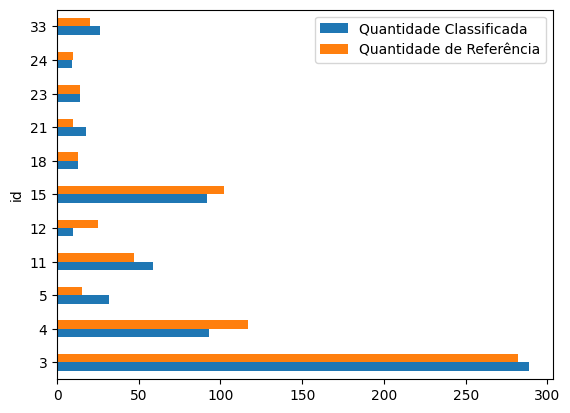

In [130]:
df_by_class_formatar.plot(kind='barh')

In [131]:
#s_by_class = df_by_class_formatar.sort_values('Quantidade Classificada', ascending=False).style
s_by_class = df_by_class_formatar.style
s_by_class

,Classe,Quantidade Classificada,Quantidade de Referência
id,,,
3,1.1. Formação Florestal,289,282
4,1.2. Formação Savânica,93,117
5,1.3. Mangue,32,15
11,2.1. Campo Alagado e Área Pantanosa,59,47
12,2.2. Formação Campestre (Campo),10,25
15,3.1. Pastagem,92,102
18,3.2. Agricultura,13,13
21,3.4. Mosaico de Usos,18,10
23,4.1. Praia e Duna,14,14


In [132]:
s_by_class.format ({
    'Quantidade Classificada' : '{:.0f}',
    'Quantidade de Referência' : '{:.0f}'
})

,Classe,Quantidade Classificada,Quantidade de Referência
id,,,
3,1.1. Formação Florestal,289,282
4,1.2. Formação Savânica,93,117
5,1.3. Mangue,32,15
11,2.1. Campo Alagado e Área Pantanosa,59,47
12,2.2. Formação Campestre (Campo),10,25
15,3.1. Pastagem,92,102
18,3.2. Agricultura,13,13
21,3.4. Mosaico de Usos,18,10
23,4.1. Praia e Duna,14,14


In [133]:
file = open ('tmp/saida.html','w')
file.write(s_by_class.to_html())
file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'tmp/saida.html'

## Analise da acuracia

### Preparação das variáveis usadas para calcular

In [134]:
from sklearn.metrics import confusion_matrix

In [135]:
y_true = df_acc[['reference']].to_numpy().flatten()
y_pred = df_acc[['classification']].to_numpy().flatten()

verificar se existe classes em uma e nao na outra

In [136]:
set(y_pred) - set (y_true)

set()

In [137]:
set(y_true) - set (y_pred)

set()

In [138]:
matrix_sem_peso = confusion_matrix(y_true, y_pred).T
print (matrix_sem_peso)

[[225  34   1   0   3  23   1   0   0   0   2]
 [ 12  69   0   0   4   8   0   0   0   0   0]
 [ 18   0  14   0   0   0   0   0   0   0   0]
 [  8   0   0  38   7   6   0   0   0   0   0]
 [  0   6   0   0   1   2   0   0   0   0   1]
 [ 16   4   0   3   6  61   0   0   0   2   0]
 [  0   0   0   0   0   1  12   0   0   0   0]
 [  1   4   0   0   3   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0  14   0   0]
 [  0   0   0   0   0   1   0   0   0   8   0]
 [  2   0   0   6   1   0   0   0   0   0  17]]


In [152]:
matrix_sem_peso.sum()

np.int64(655)

In [153]:
matrix_sem_peso.diagonal().sum() 

np.int64(469)

In [154]:
matrix_sem_peso.sum() - matrix_sem_peso.diagonal().sum() 

np.int64(186)

In [139]:
matrix_sem_peso.diagonal().sum() / matrix_sem_peso.sum()

np.float64(0.716030534351145)

In [140]:
total = matrix_sem_peso.sum()
total

np.int64(655)

In [141]:
classes_index = list (set(y_true).union(set (y_pred)))
classes_index

[np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(11),
 np.int64(12),
 np.int64(15),
 np.int64(18),
 np.int64(21),
 np.int64(23),
 np.int64(24),
 np.int64(33)]

In [142]:
df_matriz_confusao_qt = pd.DataFrame(matrix_sem_peso, index=classes_index, columns=classes_index)

#### Formatacao para artigo

In [143]:
df_matriz_confusao_qt['Tot'] = df_matriz_confusao_qt.sum(axis=1)
df_matriz_confusao_qt

,3,4,5,11,12,15,18,21,23,24,33,Tot
3,225,34,1,0,3,23,1,0,0,0,2,289
4,12,69,0,0,4,8,0,0,0,0,0,93
5,18,0,14,0,0,0,0,0,0,0,0,32
11,8,0,0,38,7,6,0,0,0,0,0,59
12,0,6,0,0,1,2,0,0,0,0,1,10
15,16,4,0,3,6,61,0,0,0,2,0,92
18,0,0,0,0,0,1,12,0,0,0,0,13
21,1,4,0,0,3,0,0,10,0,0,0,18
23,0,0,0,0,0,0,0,0,14,0,0,14
24,0,0,0,0,0,1,0,0,0,8,0,9


In [144]:
df_matriz_confusao_qt.loc['Tot'] = df_matriz_confusao_qt.sum(axis=0)

In [145]:
df_matriz_confusao_qt

,3,4,5,11,12,15,18,21,23,24,33,Tot
3,225,34,1,0,3,23,1,0,0,0,2,289
4,12,69,0,0,4,8,0,0,0,0,0,93
5,18,0,14,0,0,0,0,0,0,0,0,32
11,8,0,0,38,7,6,0,0,0,0,0,59
12,0,6,0,0,1,2,0,0,0,0,1,10
15,16,4,0,3,6,61,0,0,0,2,0,92
18,0,0,0,0,0,1,12,0,0,0,0,13
21,1,4,0,0,3,0,0,10,0,0,0,18
23,0,0,0,0,0,0,0,0,14,0,0,14
24,0,0,0,0,0,1,0,0,0,8,0,9


In [146]:
style_matriz_peso_qt = df_matriz_confusao_qt.style
style_matriz_peso_qt

,3,4,5,11,12,15,18,21,23,24,33,Tot
3,225,34,1,0,3,23,1,0,0,0,2,289
4,12,69,0,0,4,8,0,0,0,0,0,93
5,18,0,14,0,0,0,0,0,0,0,0,32
11,8,0,0,38,7,6,0,0,0,0,0,59
12,0,6,0,0,1,2,0,0,0,0,1,10
15,16,4,0,3,6,61,0,0,0,2,0,92
18,0,0,0,0,0,1,12,0,0,0,0,13
21,1,4,0,0,3,0,0,10,0,0,0,18
23,0,0,0,0,0,0,0,0,14,0,0,14
24,0,0,0,0,0,1,0,0,0,8,0,9


In [147]:
style_matriz_peso_qt.apply(lambda x: ['background-color: gray' if x.name == col else '' for col in x.index], axis=1)

,3,4,5,11,12,15,18,21,23,24,33,Tot
3,225,34,1,0,3,23,1,0,0,0,2,289
4,12,69,0,0,4,8,0,0,0,0,0,93
5,18,0,14,0,0,0,0,0,0,0,0,32
11,8,0,0,38,7,6,0,0,0,0,0,59
12,0,6,0,0,1,2,0,0,0,0,1,10
15,16,4,0,3,6,61,0,0,0,2,0,92
18,0,0,0,0,0,1,12,0,0,0,0,13
21,1,4,0,0,3,0,0,10,0,0,0,18
23,0,0,0,0,0,0,0,0,14,0,0,14
24,0,0,0,0,0,1,0,0,0,8,0,9


In [148]:
file = open ('tmp/saida.html','w')
file.write(style_matriz_peso_qt.to_html())

FileNotFoundError: [Errno 2] No such file or directory: 'tmp/saida.html'

### Matriz Sem Área

In [149]:
total, _ = df_acc.shape
total

655

In [150]:
pd.DataFrame ((confusion_matrix(y_true, y_pred).T) ,  columns=class_names, index=class_names)

,1.1. Formação Florestal,1.2. Formação Savânica,1.3. Mangue,2.1. Campo Alagado e Área Pantanosa,2.2. Formação Campestre (Campo),3.1. Pastagem,3.2. Agricultura,3.4. Mosaico de Usos,4.1. Praia e Duna,4.2. Infraestrutura Urbana,"5.1. Rio, Lago e Oceano"
1.1. Formação Florestal,225,34,1,0,3,23,1,0,0,0,2
1.2. Formação Savânica,12,69,0,0,4,8,0,0,0,0,0
1.3. Mangue,18,0,14,0,0,0,0,0,0,0,0
2.1. Campo Alagado e Área Pantanosa,8,0,0,38,7,6,0,0,0,0,0
2.2. Formação Campestre (Campo),0,6,0,0,1,2,0,0,0,0,1
3.1. Pastagem,16,4,0,3,6,61,0,0,0,2,0
3.2. Agricultura,0,0,0,0,0,1,12,0,0,0,0
3.4. Mosaico de Usos,1,4,0,0,3,0,0,10,0,0,0
4.1. Praia e Duna,0,0,0,0,0,0,0,0,14,0,0
4.2. Infraestrutura Urbana,0,0,0,0,0,1,0,0,0,8,0


In [151]:
df_matriz = pd.DataFrame ((confusion_matrix(y_true, y_pred).T) / total,  columns=class_names, index=class_names)
df_matriz

,1.1. Formação Florestal,1.2. Formação Savânica,1.3. Mangue,2.1. Campo Alagado e Área Pantanosa,2.2. Formação Campestre (Campo),3.1. Pastagem,3.2. Agricultura,3.4. Mosaico de Usos,4.1. Praia e Duna,4.2. Infraestrutura Urbana,"5.1. Rio, Lago e Oceano"
1.1. Formação Florestal,0.343511,0.051908,0.001527,0.000000,0.004580,0.035115,0.001527,0.000000,0.000000,0.000000,0.003053
1.2. Formação Savânica,0.018321,0.105344,0.000000,0.000000,0.006107,0.012214,0.000000,0.000000,0.000000,0.000000,0.000000
1.3. Mangue,0.027481,0.000000,0.021374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.1. Campo Alagado e Área Pantanosa,0.012214,0.000000,0.000000,0.058015,0.010687,0.009160,0.000000,0.000000,0.000000,0.000000,0.000000
2.2. Formação Campestre (Campo),0.000000,0.009160,0.000000,0.000000,0.001527,0.003053,0.000000,0.000000,0.000000,0.000000,0.001527
3.1. Pastagem,0.024427,0.006107,0.000000,0.004580,0.009160,0.093130,0.000000,0.000000,0.000000,0.003053,0.000000
3.2. Agricultura,0.000000,0.000000,0.000000,0.000000,0.000000,0.001527,0.018321,0.000000,0.000000,0.000000,0.000000
3.4. Mosaico de Usos,0.001527,0.006107,0.000000,0.000000,0.004580,0.000000,0.000000,0.015267,0.000000,0.000000,0.000000
4.1. Praia e Duna,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021374,0.000000,0.000000
4.2. Infraestrutura Urbana,0.000000,0.000000,0.000000,0.000000,0.000000,0.001527,0.000000,0.000000,0.000000,0.012214,0.000000


### Calculo da acuracia

In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [156]:
total = df_matriz.sum().sum()
total

np.float64(1.0)

In [157]:
concordancia = np.diag(df_matriz.values)
concordancia

array([0.34351145, 0.10534351, 0.02137405, 0.05801527, 0.00152672,
       0.09312977, 0.01832061, 0.01526718, 0.02137405, 0.01221374,
       0.0259542 ])

In [158]:
total_class= df_matriz.sum(axis=1)
total_class

1.1. Formação Florestal                0.441221
1.2. Formação Savânica                 0.141985
1.3. Mangue                            0.048855
2.1. Campo Alagado e Área Pantanosa    0.090076
2.2. Formação Campestre (Campo)        0.015267
3.1. Pastagem                          0.140458
3.2. Agricultura                       0.019847
3.4. Mosaico de Usos                   0.027481
4.1. Praia e Duna                      0.021374
4.2. Infraestrutura Urbana             0.013740
5.1. Rio, Lago e Oceano                0.039695
dtype: float64

In [159]:
total_ref = df_matriz.sum(axis=0)
total_ref

1.1. Formação Florestal                0.430534
1.2. Formação Savânica                 0.178626
1.3. Mangue                            0.022901
2.1. Campo Alagado e Área Pantanosa    0.071756
2.2. Formação Campestre (Campo)        0.038168
3.1. Pastagem                          0.155725
3.2. Agricultura                       0.019847
3.4. Mosaico de Usos                   0.015267
4.1. Praia e Duna                      0.021374
4.2. Infraestrutura Urbana             0.015267
5.1. Rio, Lago e Oceano                0.030534
dtype: float64

In [160]:
total_concordancia  = concordancia.sum()
total_concordancia

np.float64(0.716030534351145)

#### Acuracia Global

In [161]:
AG = total_concordancia
AG

np.float64(0.716030534351145)

#### Erro Global

In [162]:
EG = 1 - AG
EG

np.float64(0.28396946564885495)

#### Acuracia do consumidor e erros de comissao

In [163]:
AC = concordancia / total_class
AC.sort_values(ascending=False)

4.1. Praia e Duna                      1.000000
3.2. Agricultura                       0.923077
4.2. Infraestrutura Urbana             0.888889
1.1. Formação Florestal                0.778547
1.2. Formação Savânica                 0.741935
3.1. Pastagem                          0.663043
5.1. Rio, Lago e Oceano                0.653846
2.1. Campo Alagado e Área Pantanosa    0.644068
3.4. Mosaico de Usos                   0.555556
1.3. Mangue                            0.437500
2.2. Formação Campestre (Campo)        0.100000
dtype: float64

aqui estou fazendo o equivalente ao micro

In [164]:
concordancia.sum() / total_class.sum()

np.float64(0.7160305343511452)

Micro: Calcula a métrica globalmente.
Macro: Calcula a métrica para cada classe e depois tira a média.
Weighted: Calcula a métrica para cada classe e tira a média ponderada pelo suporte de cada classe.

In [165]:
precision_score(y_true, y_pred, average='micro')

np.float64(0.716030534351145)

In [166]:
EC = 1 - AC
EC.sort_values(ascending=False)

2.2. Formação Campestre (Campo)        0.900000
1.3. Mangue                            0.562500
3.4. Mosaico de Usos                   0.444444
2.1. Campo Alagado e Área Pantanosa    0.355932
5.1. Rio, Lago e Oceano                0.346154
3.1. Pastagem                          0.336957
1.2. Formação Savânica                 0.258065
1.1. Formação Florestal                0.221453
4.2. Infraestrutura Urbana             0.111111
3.2. Agricultura                       0.076923
4.1. Praia e Duna                      0.000000
dtype: float64

In [167]:
1 - concordancia.sum() / total_class.sum()

np.float64(0.28396946564885484)

#### Acuracia do produtor e erros de omissao

In [168]:
AP = concordancia / total_ref
AP.sort_values(ascending=False)

4.1. Praia e Duna                      1.000000
3.4. Mosaico de Usos                   1.000000
1.3. Mangue                            0.933333
3.2. Agricultura                       0.923077
5.1. Rio, Lago e Oceano                0.850000
2.1. Campo Alagado e Área Pantanosa    0.808511
4.2. Infraestrutura Urbana             0.800000
1.1. Formação Florestal                0.797872
3.1. Pastagem                          0.598039
1.2. Formação Savânica                 0.589744
2.2. Formação Campestre (Campo)        0.040000
dtype: float64

In [169]:
concordancia.sum() / total_ref.sum()

np.float64(0.716030534351145)

In [170]:
recall_score(y_true, y_pred, average='micro')

np.float64(0.716030534351145)

In [171]:
EO = 1 - AP
EO

1.1. Formação Florestal                0.202128
1.2. Formação Savânica                 0.410256
1.3. Mangue                            0.066667
2.1. Campo Alagado e Área Pantanosa    0.191489
2.2. Formação Campestre (Campo)        0.960000
3.1. Pastagem                          0.401961
3.2. Agricultura                       0.076923
3.4. Mosaico de Usos                   0.000000
4.1. Praia e Duna                      0.000000
4.2. Infraestrutura Urbana             0.200000
5.1. Rio, Lago e Oceano                0.150000
dtype: float64

In [172]:
df_by_class

,Class_Names,qt_class,qt_reference
Class_Values,,,
3,1.1. Formação Florestal,289,282
4,1.2. Formação Savânica,93,117
5,1.3. Mangue,32,15
11,2.1. Campo Alagado e Área Pantanosa,59,47
12,2.2. Formação Campestre (Campo),10,25
15,3.1. Pastagem,92,102
18,3.2. Agricultura,13,13
21,3.4. Mosaico de Usos,18,10
23,4.1. Praia e Duna,14,14


In [173]:
df_class_acuracias = df_by_class.set_index('Class_Names')
df_class_acuracias

,qt_class,qt_reference
Class_Names,,
1.1. Formação Florestal,289,282
1.2. Formação Savânica,93,117
1.3. Mangue,32,15
2.1. Campo Alagado e Área Pantanosa,59,47
2.2. Formação Campestre (Campo),10,25
3.1. Pastagem,92,102
3.2. Agricultura,13,13
3.4. Mosaico de Usos,18,10
4.1. Praia e Duna,14,14


In [174]:
df_class_acuracias.columns = ["Classificado", "Referência"]
df_class_acuracias

,Classificado,Referência
Class_Names,,
1.1. Formação Florestal,289,282
1.2. Formação Savânica,93,117
1.3. Mangue,32,15
2.1. Campo Alagado e Área Pantanosa,59,47
2.2. Formação Campestre (Campo),10,25
3.1. Pastagem,92,102
3.2. Agricultura,13,13
3.4. Mosaico de Usos,18,10
4.1. Praia e Duna,14,14


In [175]:
df_class_acuracias['Acurácia do Consumidor'] = AC
df_class_acuracias['Acurácia do Produtor'] = AP
df_class_acuracias

,Classificado,Referência,Acurácia do Consumidor,Acurácia do Produtor
Class_Names,,,,
1.1. Formação Florestal,289,282,0.778547,0.797872
1.2. Formação Savânica,93,117,0.741935,0.589744
1.3. Mangue,32,15,0.437500,0.933333
2.1. Campo Alagado e Área Pantanosa,59,47,0.644068,0.808511
2.2. Formação Campestre (Campo),10,25,0.100000,0.040000
3.1. Pastagem,92,102,0.663043,0.598039
3.2. Agricultura,13,13,0.923077,0.923077
3.4. Mosaico de Usos,18,10,0.555556,1.000000
4.1. Praia e Duna,14,14,1.000000,1.000000


In [176]:
##style_acuracia_classes = pd.DataFrame({ 'Acuracia do Consumidor': AC, 'Erros de Comissão':EC, 'Acuracia do Produtor': AP, 'Erros de Omissão':EO}).style
style_acuracia_classes = df_class_acuracias.style
style_acuracia_classes

,Classificado,Referência,Acurácia do Consumidor,Acurácia do Produtor
Class_Names,,,,
1.1. Formação Florestal,289,282,0.778547,0.797872
1.2. Formação Savânica,93,117,0.741935,0.589744
1.3. Mangue,32,15,0.437500,0.933333
2.1. Campo Alagado e Área Pantanosa,59,47,0.644068,0.808511
2.2. Formação Campestre (Campo),10,25,0.100000,0.040000
3.1. Pastagem,92,102,0.663043,0.598039
3.2. Agricultura,13,13,0.923077,0.923077
3.4. Mosaico de Usos,18,10,0.555556,1.000000
4.1. Praia e Duna,14,14,1.000000,1.000000


In [177]:
style_acuracia_classes.format({
    'Acurácia do Consumidor' : '{:.2f}',
    'Acurácia do Produtor' : '{:.2f}'
})

,Classificado,Referência,Acurácia do Consumidor,Acurácia do Produtor
Class_Names,,,,
1.1. Formação Florestal,289,282,0.78,0.80
1.2. Formação Savânica,93,117,0.74,0.59
1.3. Mangue,32,15,0.44,0.93
2.1. Campo Alagado e Área Pantanosa,59,47,0.64,0.81
2.2. Formação Campestre (Campo),10,25,0.10,0.04
3.1. Pastagem,92,102,0.66,0.60
3.2. Agricultura,13,13,0.92,0.92
3.4. Mosaico de Usos,18,10,0.56,1.00
4.1. Praia e Duna,14,14,1.00,1.00


In [180]:
file = open ('tmp/saida.html','w', encoding='utf-8')
file.write(style_acuracia_classes.to_html())
file.close()

#### F1 Score

In [181]:
f1_score(y_true, y_pred, average='micro')

np.float64(0.716030534351145)

#### Erro de quantidade (area disagrement)

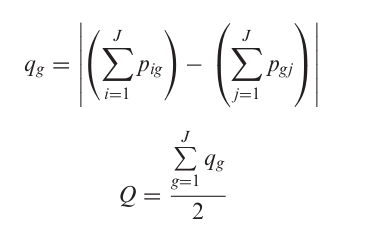

In [182]:
QD = (np.abs(total_ref - total_class)).sum() / 2
QD

np.float64(0.0763358778625954)

logo erro de alocação é 

In [183]:
EG - QD

np.float64(0.20763358778625957)

vamos aqui usar pela formula

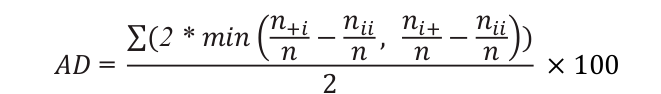

In [184]:
menor_diferenca = np.minimum((total_class - concordancia), (total_ref - concordancia))
menor_diferenca

1.1. Formação Florestal                0.087023
1.2. Formação Savânica                 0.036641
1.3. Mangue                            0.001527
2.1. Campo Alagado e Área Pantanosa    0.013740
2.2. Formação Campestre (Campo)        0.013740
3.1. Pastagem                          0.047328
3.2. Agricultura                       0.001527
3.4. Mosaico de Usos                   0.000000
4.1. Praia e Duna                      0.000000
4.2. Infraestrutura Urbana             0.001527
5.1. Rio, Lago e Oceano                0.004580
dtype: float64

In [185]:
AD = ((menor_diferenca * 2).sum() / 2) 
AD

np.float64(0.20763358778625957)

### Indice Kappa

In [186]:
from sklearn.metrics import cohen_kappa_score

In [187]:
kappa = cohen_kappa_score(y_true, y_pred)
kappa

np.float64(0.622354341545672)

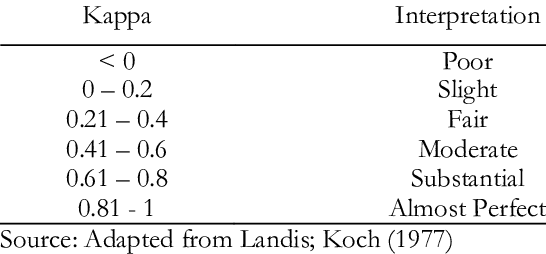

### Com estimativa de área

#### Preparacao

a probabilidade, que é a quantidade de amostras sobre a populacão, e esta salva com ajustes de acordo com o voto em peso_voto

ver os valores antes desse ajuste

In [188]:
df_acc['PESO_VOT'].describe()

count    655.000000
mean       0.000008
std        0.000008
min        0.000005
25%        0.000005
50%        0.000007
75%        0.000007
max        0.000182
Name: PESO_VOT, dtype: float64

In [189]:
biomes = df_acc['BioNB'].unique()
biomes

array(['Amazônia', 'Cerrado'], dtype=object)

acho que é feito por biomas, pq em alguns biomas eles usam dados da validacao no treinamento

aqui eu corrigi o codigo que estava em  https://github.com/mapbiomas-brazil/accuraccy/blob/mapbiomas80/src/estimates_codes/2_accuracy_estimates.py, para de fato excluir as amostras que foram usadas no treinamento. La nao esta excluindo por erro de digitacao, 'treinamento'

In [190]:
for biome in biomes:
        print ("biome", biome)
        biome_filter = (df_acc['BioNB'] == biome)
        n_samples, _ = df_acc[biome_filter & (df_acc['AMOSTRAS'] != 'treinamento')].shape
        t_samples, _ = df_acc[biome_filter].shape
        print ("amostras sem treinamento", n_samples, "amostras com treinamento", t_samples)
        prob_biome_adjs = n_samples / t_samples
        df_acc.loc[biome_filter, 'PESO_VOT'] = df_acc[biome_filter]['PESO_VOT'] * prob_biome_adjs

biome Amazônia
amostras sem treinamento 213 amostras com treinamento 213
biome Cerrado
amostras sem treinamento 442 amostras com treinamento 442


In [191]:
#df_acc = df_acc[df_acc['AMOSTRAS'] != 'Treinamento']

In [192]:
df_acc['PESO_VOT'].describe()

count    655.000000
mean       0.000008
std        0.000008
min        0.000005
25%        0.000005
50%        0.000007
75%        0.000007
max        0.000182
Name: PESO_VOT, dtype: float64

In [193]:
sample_weight = 1 / df_acc[['PESO_VOT']].to_numpy().flatten()
population = sample_weight.sum()


In [194]:
len(sample_weight)

655

In [195]:
population

np.float64(102217835.28671485)

In [196]:
matrix_ponderada = confusion_matrix(y_true, y_pred, sample_weight=sample_weight/population)

In [197]:
matrix_ponderada = matrix_ponderada.T
print (matrix_ponderada)

[[3.78116660e-01 4.85892949e-02 5.36892606e-05 0.00000000e+00
  2.08602385e-03 3.39858417e-02 6.95119062e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.78092069e-03]
 [1.73639098e-02 1.02849160e-01 0.00000000e+00 0.00000000e+00
  2.78114291e-03 1.11095090e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.08531662e-02 0.00000000e+00 2.15538020e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.33813427e-03 0.00000000e+00 0.00000000e+00 4.03209056e-02
  1.04276748e-02 9.73344463e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.64853188e-03 0.00000000e+00 0.00000000e+00
  6.95119062e-04 3.47559531e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.07347377e-03]
 [2.29433734e-02 5.56184138e-03 0.00000000e+00 3.47626197e-03
  5.56161916e-03 1.06996936e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00

In [198]:
if level == 'l1':
    class_names = sorted(class_names)     
    class_values = sorted(class_values)

In [199]:
df_matriz = pd.DataFrame(matrix_ponderada, columns=class_names, index=class_names)
df_matriz

,1.1. Formação Florestal,1.2. Formação Savânica,1.3. Mangue,2.1. Campo Alagado e Área Pantanosa,2.2. Formação Campestre (Campo),3.1. Pastagem,3.2. Agricultura,3.4. Mosaico de Usos,4.1. Praia e Duna,4.2. Infraestrutura Urbana,"5.1. Rio, Lago e Oceano"
1.1. Formação Florestal,0.378117,0.048589,0.000054,0.000000,0.002086,0.033986,0.000695,0.000000,0.000000,0.000000,0.002781
1.2. Formação Savânica,0.017364,0.102849,0.000000,0.000000,0.002781,0.011110,0.000000,0.000000,0.000000,0.000000,0.000000
1.3. Mangue,0.020853,0.000000,0.021554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.1. Campo Alagado e Área Pantanosa,0.008338,0.000000,0.000000,0.040321,0.010428,0.009733,0.000000,0.000000,0.000000,0.000000,0.000000
2.2. Formação Campestre (Campo),0.000000,0.007649,0.000000,0.000000,0.000695,0.003476,0.000000,0.000000,0.000000,0.000000,0.002073
3.1. Pastagem,0.022943,0.005562,0.000000,0.003476,0.005562,0.106997,0.000000,0.000000,0.000000,0.002082,0.000000
3.2. Agricultura,0.000000,0.000000,0.000000,0.000000,0.000000,0.000695,0.019458,0.000000,0.000000,0.000000,0.000000
3.4. Mosaico de Usos,0.002086,0.005562,0.000000,0.000000,0.002781,0.000000,0.000000,0.013205,0.000000,0.000000,0.000000
4.1. Praia e Duna,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026397,0.000000,0.000000
4.2. Infraestrutura Urbana,0.000000,0.000000,0.000000,0.000000,0.000000,0.001390,0.000000,0.000000,0.000000,0.013893,0.000000


### Calculo da acuracia

In [200]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [201]:
total = df_matriz.sum().sum()
total

np.float64(1.0000000000000004)

In [202]:
concordancia = np.diag(df_matriz.values)
concordancia

array([0.37811666, 0.10284916, 0.0215538 , 0.04032091, 0.00069512,
       0.10699694, 0.01945808, 0.01320508, 0.02639694, 0.01389316,
       0.03264683])

In [203]:
total_class= df_matriz.sum(axis=1)
total_class

1.1. Formação Florestal                0.466308
1.2. Formação Savânica                 0.134104
1.3. Mangue                            0.042407
2.1. Campo Alagado e Área Pantanosa    0.068820
2.2. Formação Campestre (Campo)        0.013893
3.1. Pastagem                          0.146622
3.2. Agricultura                       0.020153
3.4. Mosaico de Usos                   0.023634
4.1. Praia e Duna                      0.026397
4.2. Infraestrutura Urbana             0.015283
5.1. Rio, Lago e Oceano                0.042379
dtype: float64

In [204]:
total_ref = df_matriz.sum(axis=0)
total_ref

1.1. Formação Florestal                0.451787
1.2. Formação Savânica                 0.170211
1.3. Mangue                            0.021607
2.1. Campo Alagado e Área Pantanosa    0.050749
2.2. Formação Campestre (Campo)        0.025028
3.1. Pastagem                          0.167387
3.2. Agricultura                       0.020153
3.4. Mosaico de Usos                   0.013205
4.1. Praia e Duna                      0.026397
4.2. Infraestrutura Urbana             0.015975
5.1. Rio, Lago e Oceano                0.037501
dtype: float64

In [205]:
total_concordancia  = concordancia.sum()
total_concordancia

np.float64(0.756132670516976)

#### Acuracia Global

In [206]:
AG = total_concordancia
AG

np.float64(0.756132670516976)

#### Erro Global

In [207]:
EG = 1 - AG
EG

np.float64(0.24386732948302403)

#### Acuracia do consumidor e erros de comissao

In [208]:
AC = concordancia / total_class
AC.sort_values(ascending=False)

4.1. Praia e Duna                      1.000000
3.2. Agricultura                       0.965498
4.2. Infraestrutura Urbana             0.909036
1.1. Formação Florestal                0.810874
5.1. Rio, Lago e Oceano                0.770355
1.2. Formação Savânica                 0.766937
3.1. Pastagem                          0.729747
2.1. Campo Alagado e Área Pantanosa    0.585888
3.4. Mosaico de Usos                   0.558725
1.3. Mangue                            0.508261
2.2. Formação Campestre (Campo)        0.050035
dtype: float64

aqui estou fazendo o equivalente ao micro

In [209]:
concordancia.sum() / total_class.sum()

np.float64(0.7561326705169756)

Micro: Calcula a métrica globalmente.
Macro: Calcula a métrica para cada classe e depois tira a média.
Weighted: Calcula a métrica para cada classe e tira a média ponderada pelo suporte de cada classe.

In [210]:
precision_score(y_true, y_pred, average='micro')

np.float64(0.716030534351145)

In [211]:
EC = 1 - AC
EC.sort_values(ascending=False)

2.2. Formação Campestre (Campo)        0.949965
1.3. Mangue                            0.491739
3.4. Mosaico de Usos                   0.441275
2.1. Campo Alagado e Área Pantanosa    0.414112
3.1. Pastagem                          0.270253
1.2. Formação Savânica                 0.233063
5.1. Rio, Lago e Oceano                0.229645
1.1. Formação Florestal                0.189126
4.2. Infraestrutura Urbana             0.090964
3.2. Agricultura                       0.034502
4.1. Praia e Duna                      0.000000
dtype: float64

In [212]:
1 - concordancia.sum() / total_class.sum()

np.float64(0.24386732948302436)

#### Acuracia do produtor e erros de omissao

In [213]:
AP = concordancia / total_ref
AP.sort_values(ascending=False)

4.1. Praia e Duna                      1.000000
3.4. Mosaico de Usos                   1.000000
1.3. Mangue                            0.997515
3.2. Agricultura                       0.965508
5.1. Rio, Lago e Oceano                0.870554
4.2. Infraestrutura Urbana             0.869681
1.1. Formação Florestal                0.836936
2.1. Campo Alagado e Área Pantanosa    0.794519
3.1. Pastagem                          0.639219
1.2. Formação Savânica                 0.604245
2.2. Formação Campestre (Campo)        0.027774
dtype: float64

In [214]:
concordancia.sum() / total_ref.sum()

np.float64(0.7561326705169756)

In [215]:
recall_score(y_true, y_pred, average='micro')

np.float64(0.716030534351145)

In [216]:
EO = 1 - AP
EO

1.1. Formação Florestal                0.163064
1.2. Formação Savânica                 0.395755
1.3. Mangue                            0.002485
2.1. Campo Alagado e Área Pantanosa    0.205481
2.2. Formação Campestre (Campo)        0.972226
3.1. Pastagem                          0.360781
3.2. Agricultura                       0.034492
3.4. Mosaico de Usos                   0.000000
4.1. Praia e Duna                      0.000000
4.2. Infraestrutura Urbana             0.130319
5.1. Rio, Lago e Oceano                0.129446
dtype: float64

#### F1 Score

In [217]:
f1_score(y_true, y_pred, average='micro')

np.float64(0.716030534351145)

#### Erro de quantidade (area disagrement)



In [218]:
QD = (np.abs(total_ref - total_class)).sum() / 2
QD

np.float64(0.06869892775830949)

logo erro de alocação é 

In [219]:
EG - QD

np.float64(0.17516840172471454)

In [220]:
menor_diferenca = np.minimum((total_class - concordancia), (total_ref - concordancia))
menor_diferenca

1.1. Formação Florestal                0.073670
1.2. Formação Savânica                 0.031255
1.3. Mangue                            0.000054
2.1. Campo Alagado e Área Pantanosa    0.010428
2.2. Formação Campestre (Campo)        0.013198
3.1. Pastagem                          0.039625
3.2. Agricultura                       0.000695
3.4. Mosaico de Usos                   0.000000
4.1. Praia e Duna                      0.000000
4.2. Infraestrutura Urbana             0.001390
5.1. Rio, Lago e Oceano                0.004854
dtype: float64

In [221]:
AD = ((menor_diferenca * 2).sum() / 2) 
AD

np.float64(0.17516840172471496)

### Indice Kappa

In [222]:
from sklearn.metrics import cohen_kappa_score

In [223]:
kappa = cohen_kappa_score(y_true, y_pred)
kappa

np.float64(0.622354341545672)

## Visualização geográfica

In [224]:
df_acc.columns

Index(['system:index', 'AMOSTRAS', 'AMOSTRA_AM', 'BioNB', 'CARTA_2',
       'CLASS_2022', 'DECLIVIDAD', 'LAT', 'LON', 'NEW_PROB', 'NEW_WEIGHT',
       'PESO_VOT', 'PROB_AMOS2', 'StateNB', 'TARGETID', 'VAL_PESO',
       'classification', 'reference', 'year', '.geo', 'strata_id', 'pop',
       'n_samp'],
      dtype='object')

In [225]:
import geopandas as gpd
from shapely.geometry import Point

In [226]:
geometry = [Point(xy) for xy in zip(df_acc['LON'], df_acc['LAT'])]

In [227]:
gdf = gpd.GeoDataFrame(df_acc, geometry=geometry)

In [228]:
# Definindo o sistema de coordenadas (CRS) - aqui, WGS84 (epsg:4326)
gdf.set_crs(epsg=4326, inplace=True)

,system:index,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,...,TARGETID,VAL_PESO,classification,reference,year,.geo,strata_id,pop,n_samp,geometry
1,00000000000000004b0e_0,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.951507,-44.961886,0.000012,...,16624,1.000000,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303,POINT (-44.96189 -3.95151)
3,00000000000000004b1b_0,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.823672,-44.723653,0.000012,...,16656,1.000000,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303,POINT (-44.72365 -2.82367)
5,00000000000000004b2f_0,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.127662,-44.787253,0.000012,...,16709,1.000000,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303,POINT (-44.78725 -3.12766)
6,00000000000000004b34_0,Treinamento,1,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.696471,-44.734432,0.000012,...,16717,1.000000,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303,POINT (-44.73443 -2.69647)
7,00000000000000004b36_0,Treinamento,1,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.555350,-44.806927,0.000012,...,16720,1.000000,11,11,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303,POINT (-44.80693 -3.55535)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,000000000000000050b6_0,NaN,0,Cerrado,SA-23-Z,FORMAÇÃO SAVÂNICA,D2,-2.826906,-42.711876,0.000011,...,2407,1.000000,4,4,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0,305,POINT (-42.71188 -2.82691)
708,00000000000000005101_0,NaN,0,Cerrado,SA-23-Z,PASTAGEM,D2,-3.474232,-43.978770,0.000011,...,17349,1.000000,4,15,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0,305,POINT (-43.97877 -3.47423)
709,0000000000000000506b_0,NaN,0,Cerrado,SA-23-Z,PRAIA E DUNA,D2,-2.483840,-43.042815,0.000011,...,17080,0.333333,23,23,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D2,27861902.0,305,POINT (-43.04281 -2.48384)
710,00000000000000004b5b_0,Treinamento,1,Amazônia,SA-23-Z,"RIO, LAGO E OCEANO",D1,-3.246240,-44.985601,0.000012,...,16800,0.333333,33,33,2022,"{""type"":""MultiPoint"",""coordinates"":[]}",SA-23-Z_D1,25366123.0,303,POINT (-44.9856 -3.24624)


In [229]:
gdf_erros = gdf[gdf['classification'] != gdf['reference']]
gdf_erros.shape

(186, 24)

In [230]:
gdf_erros.drop('system:index', axis=1, inplace=True)

/tmp/ipykernel_342941/1721683761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_erros.drop('system:index', axis=1, inplace=True)


In [231]:
gdf_erros.drop('.geo', axis=1, inplace=True)

/tmp/ipykernel_342941/1334426410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_erros.drop('.geo', axis=1, inplace=True)


In [232]:
gdf_erros

,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,NEW_WEIGHT,...,StateNB,TARGETID,VAL_PESO,classification,reference,year,strata_id,pop,n_samp,geometry
13,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.705998,-44.855975,0.000012,60305.967634,...,21.0,16804,1.0,33,11,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.85597 -3.706)
15,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.658742,-44.821210,0.000012,60305.967634,...,21.0,16827,1.0,33,11,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.82121 -2.65874)
23,NaN,0,Cerrado,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D2,-3.766364,-44.613968,0.000011,55301.697925,...,21.0,16983,1.0,3,12,2022,SA-23-Z_D2,27861902.0,305,POINT (-44.61397 -3.76636)
27,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D2,-3.800051,-44.672179,0.000011,55301.697925,...,21.0,17354,1.0,15,11,2022,SA-23-Z_D2,27861902.0,305,POINT (-44.67218 -3.80005)
28,NaN,0,Cerrado,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.833913,-42.068592,0.000012,60305.967634,...,21.0,2458,1.0,33,12,2022,SA-23-Z_D1,25366123.0,303,POINT (-42.06859 -2.83391)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,NaN,0,Cerrado,SA-23-Z,FORMAÇÃO FLORESTAL,D3,-3.599008,-42.008495,0.000011,56646.228228,...,22.0,12166,0.5,4,3,2022,SA-23-Z_D3,7842002.0,89,POINT (-42.00849 -3.59901)
691,Treinamento,1,Cerrado,SA-23-Z,PASTAGEM,D1,-3.426262,-44.449577,0.000012,60305.967634,...,21.0,16813,0.5,3,15,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.44958 -3.42626)
692,NaN,0,Cerrado,SA-23-Z,PASTAGEM,D2,-3.681743,-42.160490,0.000011,55301.697925,...,22.0,17032,0.5,4,15,2022,SA-23-Z_D2,27861902.0,305,POINT (-42.16049 -3.68174)
693,NaN,0,Cerrado,SA-23-Z,"RIO, LAGO E OCEANO",D1,-3.620029,-43.614413,0.000012,60305.967634,...,21.0,223,0.5,3,33,2022,SA-23-Z_D1,25366123.0,303,POINT (-43.61441 -3.62003)


<Axes: >

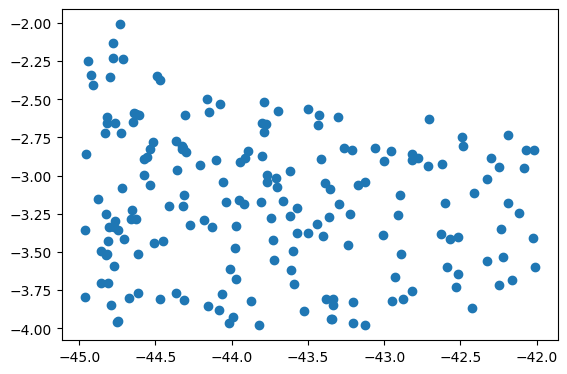

In [233]:
gdf_erros.plot()

In [234]:
gdf_erros.shape

(186, 22)

In [239]:
gdf_erros.head()

,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,NEW_WEIGHT,...,StateNB,TARGETID,VAL_PESO,classification,reference,year,strata_id,pop,n_samp,geometry
13,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.705998,-44.855975,0.000012,60305.967634,...,21.0,16804,1.0,33,11,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.85597 -3.706)
15,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.658742,-44.821210,0.000012,60305.967634,...,21.0,16827,1.0,33,11,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.82121 -2.65874)
23,NaN,0,Cerrado,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D2,-3.766364,-44.613968,0.000011,55301.697925,...,21.0,16983,1.0,3,12,2022,SA-23-Z_D2,27861902.0,305,POINT (-44.61397 -3.76636)
27,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D2,-3.800051,-44.672179,0.000011,55301.697925,...,21.0,17354,1.0,15,11,2022,SA-23-Z_D2,27861902.0,305,POINT (-44.67218 -3.80005)
28,NaN,0,Cerrado,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.833913,-42.068592,0.000012,60305.967634,...,21.0,2458,1.0,33,12,2022,SA-23-Z_D1,25366123.0,303,POINT (-42.06859 -2.83391)


In [249]:
gdf_erros.query("classification > 20")

,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,NEW_WEIGHT,...,StateNB,TARGETID,VAL_PESO,classification,reference,year,strata_id,pop,n_samp,geometry
13,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.705998,-44.855975,0.000012,60305.967634,...,21.0,16804,1.000000,33,11,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.85597 -3.706)
15,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.658742,-44.821210,0.000012,60305.967634,...,21.0,16827,1.000000,33,11,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.82121 -2.65874)
28,NaN,0,Cerrado,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.833913,-42.068592,0.000012,60305.967634,...,21.0,2458,1.000000,33,12,2022,SA-23-Z_D1,25366123.0,303,POINT (-42.06859 -2.83391)
32,NaN,0,Amazônia,SA-23-Z,FLORESTA INUNDÁVEL,D1,-2.894280,-44.577048,0.000012,60305.967634,...,21.0,16768,1.000000,33,3,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.57705 -2.89428)
45,NaN,0,Cerrado,SA-23-Z,FORMAÇÃO CAMPESTRE,D1,-3.175902,-43.808180,0.000012,60305.967634,...,21.0,11672,1.000000,21,12,2022,SA-23-Z_D1,25366123.0,303,POINT (-43.80818 -3.1759)
122,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.286125,-44.661938,0.000012,60305.967634,...,21.0,16773,0.500000,33,11,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.66194 -3.28612)
123,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-2.720186,-44.832529,0.000012,60305.967634,...,21.0,16783,0.500000,33,11,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.83253 -2.72019)
126,Treinamento,1,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D1,-3.412518,-44.705866,0.000012,60305.967634,...,21.0,16854,0.500000,33,11,2022,SA-23-Z_D1,25366123.0,303,POINT (-44.70587 -3.41252)
138,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D2,-2.649309,-44.644960,0.000011,55301.697925,...,21.0,17052,0.500000,33,11,2022,SA-23-Z_D2,27861902.0,305,POINT (-44.64496 -2.64931)
151,Treinamento,1,Cerrado,SA-23-Z,FORMAÇÃO CAMPESTRE,D2,-3.550499,-43.723289,0.000011,55301.697925,...,21.0,17292,0.500000,21,12,2022,SA-23-Z_D2,27861902.0,305,POINT (-43.72329 -3.5505)


In [241]:
gdf_erros.filter(['DECLIVIDAD'])

,DECLIVIDAD
13,D1
15,D1
23,D2
27,D2
28,D1
...,...
688,D3
691,D1
692,D2
693,D1


In [252]:
a = gdf_erros["classification"].values

In [253]:
a * a

array([1089, 1089,    9,  225, 1089,   25, 1089,   25,   25,  121,  225,
         25,  121,  225,  121,  225,  121,  225,    9,  441,   16,   16,
          9,   16,  225,   16,   16,  121,   25,  121,   25,   25,   25,
         16,  144,  144,    9,  225,  225,    9,    9,  121,    9,    9,
          9,   16,  121, 1089, 1089, 1089,  225, 1089,  225,   25,  121,
        225,  441,  121,  225,  225, 1089,  225,   25,   25,   25,   25,
         25,  121,  225,  121,   25,  225,    9,   16,   16,  225,   16,
        225,  225,   16,   25,   16,  225,    9,    9,    9,    9,    9,
         16,   16,  441,  225,    9,    9,    9,    9,    9,  225,  441,
          9,    9,  144,    9,    9,  441,  144,    9,    9,    9,    9,
          9,    9,  144,  225,    9,    9,    9,    9,    9,    9,    9,
          9,    9,    9,  225,    9,  121,    9,  576,    9,    9,    9,
        144,   16,   16,  324,    9,    9,    9,  121,  121,  121,   25,
        121,  225,    9,  225,  225,  225,    9,  2

In [260]:
a @ a

np.int64(26451)

In [261]:
np.dot(a,a)

np.int64(26451)

In [247]:
gdf_erros.sort_by()

AttributeError: 'GeoDataFrame' object has no attribute 'sort_by'

In [244]:
gdf_erros.query('DECLIVIDAD == "D2"')

,AMOSTRAS,AMOSTRA_AM,BioNB,CARTA_2,CLASS_2022,DECLIVIDAD,LAT,LON,NEW_PROB,NEW_WEIGHT,...,StateNB,TARGETID,VAL_PESO,classification,reference,year,strata_id,pop,n_samp,geometry
23,NaN,0,Cerrado,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D2,-3.766364,-44.613968,0.000011,55301.697925,...,21.0,16983,1.000000,3,12,2022,SA-23-Z_D2,27861902.0,305,POINT (-44.61397 -3.76636)
27,NaN,0,Amazônia,SA-23-Z,CAMPO ALAGADO E ÁREA PANTANOSA,D2,-3.800051,-44.672179,0.000011,55301.697925,...,21.0,17354,1.000000,15,11,2022,SA-23-Z_D2,27861902.0,305,POINT (-44.67218 -3.80005)
36,Treinamento,1,Amazônia,SA-23-Z,FLORESTA INUNDÁVEL,D2,-3.042502,-44.055576,0.000011,55301.697925,...,21.0,17221,1.000000,15,3,2022,SA-23-Z_D2,27861902.0,305,POINT (-44.05558 -3.0425)
37,NaN,0,Amazônia,SA-23-Z,FLORESTA INUNDÁVEL,D2,-2.993454,-44.575970,0.000011,55301.697925,...,21.0,17284,1.000000,5,3,2022,SA-23-Z_D2,27861902.0,305,POINT (-44.57597 -2.99345)
40,NaN,0,Amazônia,SA-23-Z,FORMAÇÃO CAMPESTRE,D2,-3.953663,-44.746560,0.000011,55301.697925,...,21.0,17066,1.000000,11,12,2022,SA-23-Z_D2,27861902.0,305,POINT (-44.74656 -3.95366)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,NaN,0,Cerrado,SA-23-Z,PASTAGEM,D2,-3.924558,-43.994131,0.000011,55301.697925,...,21.0,15414,0.333333,4,15,2022,SA-23-Z_D2,27861902.0,305,POINT (-43.99413 -3.92456)
678,NaN,0,Cerrado,SA-23-Z,FORMAÇÃO CAMPESTRE,D2,-3.765825,-44.364416,0.000011,55301.697925,...,21.0,17153,1.000000,21,12,2022,SA-23-Z_D2,27861902.0,305,POINT (-44.36442 -3.76583)
683,NaN,0,Cerrado,SA-23-Z,PASTAGEM,D2,-3.716777,-42.250501,0.000011,55301.697925,...,22.0,17056,0.500000,4,15,2022,SA-23-Z_D2,27861902.0,305,POINT (-42.2505 -3.71678)
692,NaN,0,Cerrado,SA-23-Z,PASTAGEM,D2,-3.681743,-42.160490,0.000011,55301.697925,...,22.0,17032,0.500000,4,15,2022,SA-23-Z_D2,27861902.0,305,POINT (-42.16049 -3.68174)


In [235]:
gdf_erros.to_file("tmp/pontos_amostrais_erro.shp")

/tmp/ipykernel_342941/652348810.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_erros.to_file("tmp/pontos_amostrais_erro.shp")
/home/scosta/dev/acuracia_slz/.venv/lib/python3.10/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'classification' to 'classifica'
  ogr_write(
